In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv('scrapy/output.csv')
data['amount'] = data['amount'].apply(pd.to_numeric, errors='ignore')
data.head(10)

,company,date,exercice,concept,amount
0,abengoa_(b),17/04/2015,2014.0,Unico,0.113
1,abengoa_(b),09/04/2014,2013.0,Unico,0.111
2,abengoa_(b),09/04/2013,2012.0,Unico,0.072
3,cevasa,03/07/2019,2019.0,Unico,0.200
4,cevasa,03/07/2018,2017.0,Unico,0.180
5,cevasa,03/07/2017,2016.0,Unico,0.150
6,cevasa,04/07/2016,2015.0,Unico,0.130
7,cevasa,22/06/2015,2014.0,Unico,3.000
8,cevasa,02/07/2014,2013.0,Unico,1.300
9,cevasa,15/05/2013,2012.0,Unico,1.300


In [32]:
data_company = data.loc[data['company'] == 'telefonica']
data_company.head(10)

,company,date,exercice,concept,amount
484,telefonica,19/12/2019,2019.0,n.a. (14R),0.200
485,telefonica,20/06/2019,2019.0,n.a. (14R),0.200
486,telefonica,20/12/2018,2018.0,n.a. (14R),0.200
487,telefonica,15/06/2018,2018.0,n.a. (14R),0.200
488,telefonica,14/12/2017,2016.0,A Cuenta,0.200
489,telefonica,16/06/2017,2016.0,A Cuenta,0.200
490,telefonica,01/12/2016,2016.0,A Cuenta,0.340
491,telefonica,19/05/2016,2015.0,A Cuenta,0.400
492,telefonica,18/11/2015,2015.0,A Cuenta,0.345
493,telefonica,12/05/2015,2015.0,A Cuenta,0.400


In [33]:
dividends_per_year = pd.pivot_table(data_company, index=['company', 'exercice'], columns='concept', aggfunc=np.sum, values='amount')
dividends_per_year['Total'] = dividends_per_year.sum(axis=1)
dividends_per_year

concept              A Cuenta  Complementario  Unico  n.a. (14R)  Total
company    exercice                                                    
telefonica 2003.0         NaN             NaN    0.2         NaN  0.200
           2004.0       0.230             NaN    NaN         NaN  0.230
           2005.0       0.250             NaN    NaN         NaN  0.250
           2006.0       0.300            0.30    NaN         NaN  0.600
           2007.0       0.350            0.40    NaN         NaN  0.750
           2008.0       0.500             NaN    NaN         NaN  0.500
           2009.0       1.000             NaN    NaN         NaN  1.000
           2010.0       1.300             NaN    NaN         NaN  1.300
           2011.0       1.520            0.53    NaN         NaN  2.050
           2012.0       0.285             NaN    NaN         NaN  0.285
           2013.0       0.350            0.40    NaN         NaN  0.750
           2014.0       0.336             NaN    NaN         NaN  0.336
           2015.0       1.145             NaN    NaN         NaN  1.145
           2016.0       0.740             NaN    NaN         NaN  0.740
           2018.0         NaN             NaN    NaN         0.4  0.400
           2019.0         NaN             NaN    NaN         0.4  0.400

concept,A Cuenta,Complementario,Unico,n.a. (14R),Total
count,13.000000,4.000000,1.0,2.0,16.000000
mean,0.638923,0.407500,0.2,0.4,0.683500
std,0.451539,0.094296,NaN,0.0,0.495371
min,0.230000,0.300000,0.2,0.4,0.200000
25%,0.300000,0.375000,0.2,0.4,0.323250
50%,0.350000,0.400000,0.2,0.4,0.550000
75%,1.000000,0.432500,0.2,0.4,0.812500
max,1.520000,0.530000,0.2,0.4,2.050000


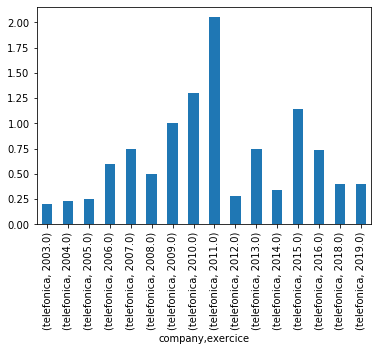

In [34]:
dividends_per_year['Total'].plot.bar()
dividends_per_year.describe()

Data about the dividends can be obtained from:

http://www.bolsamadrid.es/esp/aspx/Empresas/OperFinancieras/Dividendos.aspx


Considering exponential growth:
$$
a_n = a_0(1+d/p)^n,
$$
Where:
* _d_ the dividends per year,
* _p_ price of the stocks when they were bought,
* _n_ number of years,

The time to double the initial investment
$$
2 a_0 = a_0(1+d/p)^n \\
2 = (1+d/p)^n \\
\boxed{p = \frac{d}{2^{1/n} - 1}} \\
\boxed{n = \frac{\ln 2}{\ln \left( d/p + 1 \right)}}
$$

In our case with a p = 6.3 and d = 0.4, investors are hoping to double their money in n years:

In [36]:
d = 0.4
p = 5.3
n = np.log(2)/np.log(d/p + 1)
print(str(n) + ' years')
print("{0:.2f}% yearly profitability".format(d/p*100))

9.526571358362691 years
7.55% yearly profitability
